# House Market

Let's go a little further into python.

1. Download the four files “superficie.csv” / “nombre_de_sdb.csv” / “nombre_de_chambres.csv” / "house_price.csv"

2. Read the files and create the 4 corresponding Dataframes


In [2]:
import pandas as pd

In [4]:
surface_df = pd.read_csv("superficie.csv")
bathrooms_df = pd.read_csv("nombre_de_sdb.csv")
rooms_df = pd.read_csv("nombre_de_chambres.csv")
houses_price_df = pd.read_csv("house_price.csv")

In [10]:
surface_df
bathrooms_df


,0,2
0,1,1
1,2,1
2,3,3
3,4,1
4,5,3
...,...,...
94,95,3
95,96,1
96,97,1
97,98,1


3. Give a column name to the three datasets that don't have a header in the source file

In [28]:
surface_df.rename(columns={"0" : "id", "28844" : "surface"}, inplace=True)
bathrooms_df.rename(columns={"0" : "id", "2" : "bathrooms"}, inplace=True)
rooms_df.rename(columns={"0" : "id", "1" : "rooms"}, inplace=True)
houses_price_df.drop("Unnamed: 0", axis=1, inplace=True)

Surface:


,id,surface
0,0,28844
1,1,27667
2,2,14742
3,3,28089
4,4,11713



Bathrooms


,id,bathrooms
0,0,2
1,1,1
2,2,1
3,3,3
4,4,1



Rooms


,id,rooms
0,0,1
1,1,4
2,2,1
3,3,4
4,4,2



House prices


,id,house_price
0,14,1918154.0
1,30,739142.0
2,70,1621938.0
3,77,1319862.0
4,50,146250.0


,id,house_price
0,14,1918154.0
1,30,739142.0
2,70,1621938.0
3,77,1319862.0
4,50,146250.0


4. Make an inner join of these four datasets into a single dataframe.

In [36]:
global_df = surface_df.merge(houses_price_df, on="id").merge(bathrooms_df, on="id").merge(rooms_df, on="id")
global_df

,id,surface,house_price,bathrooms,rooms
0,1,27667,1305091.0,1,4
1,2,14742,164373.0,1,1
2,3,28089,1441714.0,3,4
3,4,11713,108290.0,1,2
4,5,28591,1703033.0,3,4
...,...,...,...,...,...
94,95,11417,132599.0,3,3
95,96,12126,155828.0,1,2
96,97,16390,237061.0,1,2
97,98,23738,976422.0,1,2


5. What is the average surface area of the houses in our dataset?

In [56]:
global_df["surface"].mean()

20730.0

6. What is the median and average number of rooms?

In [64]:
global_df["rooms"].mean()
global_df["rooms"].median()


2.0

7. What is the average cost of a house?

In [66]:
global_df["house_price"].mean()

761140.191919192

8. What is the average cost of a house, depending on the number of rooms it has?

In [70]:
display(global_df.groupby("rooms")["house_price"].mean())

rooms
1    960723.363636
2    642086.258065
3    645904.592593
4    888045.631579
Name: house_price, dtype: float64

10. The average cost per room doesn't tell us much. Let's try to categorize by size.

  - Create a new column in your dataset that we'll call home_size
Create five categories that respectively correspond to:
      - "very large" $=$ "a house larger than 25,000 sqrt_feet"
      - "large" $=$ "a house between 20,000 and 25,000 sqrt_feet"
      - "medium" $=$ "a house between 15,000 and 20,000 sqrt_feet"
      - "small" $=$ "a house between 10,000 and 15,000 sqrt_feet"
      - "very small" $=$ a house less than 10,000 sqrt_feet"

Fill in the corresponding rows in the house_size column.

In [96]:
global_df["house_size"] = global_df["surface"].apply(lambda x : 'very large' if x > 25000
                                                      else 'large' if (x > 20000) and (x <= 25000)
                                                      else 'medium' if (x > 15000) and (x <= 20000)
                                                      else 'small' if (x > 10000) and (x <= 15000)
                                                      else 'very small')
global_df

,id,surface,house_price,bathrooms,rooms,house_size
0,1,27667,1305091.0,1,4,very large
1,2,14742,164373.0,1,1,small
2,3,28089,1441714.0,3,4,very large
3,4,11713,108290.0,1,2,small
4,5,28591,1703033.0,3,4,very large
...,...,...,...,...,...,...
94,95,11417,132599.0,3,3,small
95,96,12126,155828.0,1,2,small
96,97,16390,237061.0,1,2,medium
97,98,23738,976422.0,1,2,large


11. What is the average cost of a house depending on its size category?


In [92]:
display(global_df.groupby("house_size")["house_price"].mean())

house_size
large         7.325385e+05
medium        3.256948e+05
small         1.561387e+05
very large    1.556667e+06
Name: house_price, dtype: float64

 12. Apply the code below to view your result. What can you conclude?

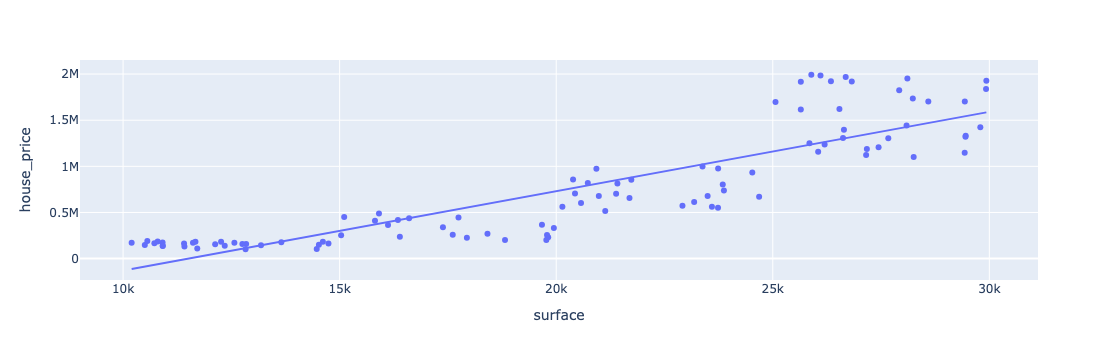

In [94]:
import plotly.express as px
fig = px.scatter(global_df, x = "surface", y = "house_price", trendline = "ols")
fig.show()